In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
blues = np.random.normal(60, 10, (100,1))
uniform = np.random.uniform(0, 1, (100,1))*100
default = uniform < blues


In [166]:
def natural_cycle(blues, true_mean=50):
    distance = np.abs(blues - true_mean)/50
    over = blues > true_mean
    under = blues < true_mean
    blues[over] -= distance[over]
    blues[under] += distance[under]
    return blues

def one_iterate(blues):
    new_blues = natural_cycle(blues)
    new_blues = classification_shift(new_blues)
    return new_blues

def classification_shift(blues, shift=0.75):
    uniform = np.random.uniform(0, 1, (len(blues),1))*100
    default = uniform < blues
    payback = uniform >= blues
    blues[payback] += shift
    blues[default] -= shift
    return blues

19.77449813455608 102.56360690267243


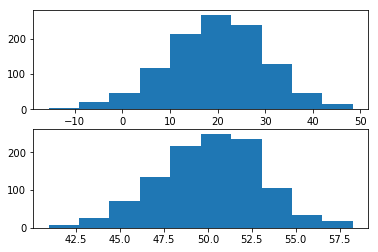

50.08458012958562 8.264640027449277


In [170]:
blues = np.random.normal(20, 10, (1090,1))
plt.subplot(211)
plt.hist(blues)
print(np.average(blues), np.var(blues))
for i in range(10000):
    blues = one_iterate(blues)
plt.subplot(212)
plt.hist(blues)
plt.show()
print(np.average(blues), np.var(blues))

# Profit maximisation